<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/Tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import tqdm.notebook as tq
from sklearn.utils import shuffle


In [132]:
iris=datasets.load_iris()
data=iris.data
labels=iris.target
data, labels = shuffle(data, labels, random_state=0)

data=data[:80,:]
labels=labels[:80]

var=1
LR=200
itter=100
momentom=0.99
PERPLEXITY=5
MOMENTUM=0.99


In [84]:
#compute the distance between the neighboors of x1 and return a list of the k neghboors
#where k is the complexity

def getKey(item):
    return item[1]

#compute the distance between the neighboors of x1 and return a list of the k neghboors
#where k is the complexity
def k_neighbours(x,x1_index,p_or_q='p'):
    x1=x[x1_index]
    list_k_neighbours=[]
    for i in range(x.shape[0]):
        if i!=x1_index:
            xi=x[i]
            if p_or_q=='p':
                distance=np.exp(-np.linalg.norm(x1-xi)**2/(2*var**2))
            else:
                distance=(1+np.linalg.norm(x1-xi)**2)**-1
            list_k_neighbours.append([i,distance])
    
    list_k_neighbours=sorted(list_k_neighbours,key=getKey)
    return list_k_neighbours[:PERPLEXITY]

In [87]:
#compute the similarity pij between two xi,xj in the original space
#divide the distance between xi,xj by the sum of the distances of the k_neightbours where k is the complexity
def compute_pij(x,x1_index,x2_index):
    x1=x[x1_index]
    x2=x[x2_index]
    num=np.exp(-np.linalg.norm(x1-x2)**2)/(2*var**2)
    denom=0
    list_k_neighbours=k_neighbours(x,x1_index,'p')
    for i in list_k_neighbours:
        denom+=i[1]
    return num/denom

In [85]:
#compute the table p of the xij in the original space
def compute_p(x):
    table=np.zeros((x.shape[0],x.shape[0]))
    for i in tq.tqdm(range(x.shape[0]),desc="compute p table"):
        for j in range(x.shape[0]):
            if i!=j:
                pij=compute_pij(x,i,j)
                pji=compute_pij(x,j,i)
                table[i,j]=(pij+pji)/(2*x.shape[0])
                # table[i,j]=pij
    return table

In [80]:
#compute the similarity qij between two yi,yj in the new space
#divide the distance between yi,yj by the sum of the distances of the k_neightbours where k is the complexity
def compute_qij(y,y1_index,y2_index):
    y1=y[y1_index]
    y2=y[y2_index]
    num=(1+np.linalg.norm(y1-y2)**2)**(-1)
    denom=0
    for i in k_neighbours(y,y1_index,'q'):
        denom+=i[1]
    return num/denom

In [116]:
#compute the table q of the yij in the new space
def compute_q(y):
    table=np.zeros((y.shape[0],y.shape[0]))
    for i in tq.tqdm(range(y.shape[0]),desc='compute q value'):
        for j in range(y.shape[0]):
            if i!=j:
                qij=compute_qij(y,i,j)
                table[i,j]=qij
    return table

In [114]:
#apply gradient descent to lower the KL-divergence
#added momentum increase the speed
def gradient_descent(p,q,y):
    history=np.zeros((p.shape[0],2,y.shape[1]))
    for iter in tq.tqdm(range(itter),desc="gradient decent loop"):
        for i in range(y.shape[0]):
            sum_value=0
            for j in range(y.shape[0]):
                sum_value+=((y[i]-y[j])*(p[i,j]-q[i,j])*(1+np.linalg.norm(y[i]-y[j]**2))**-1)
            y[i]-=4*LR*sum_value+MOMENTUM*(history[i,1]-history[i,0])
            history[i,0]=history[i,1]
            history[i,1]=y[i]
    y-=np.mean(y)
    y/=np.std(y)
    return y

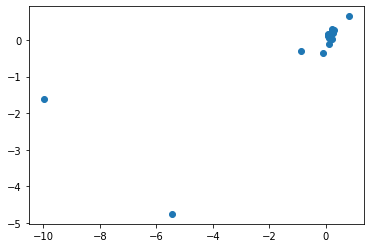

In [133]:
table_p=compute_p(data)
data_2d=data.dot(np.random.rand(data.shape[1],2))
data_2d-=np.mean(data_2d)
data_2d/=np.std(data_2d)
table_q=compute_q(data_2d)
data_2d=gradient_descent(table_p,table_q,data_2d)

plt.scatter(data_2d[:,0],data_2d[:,1])
plt.show()

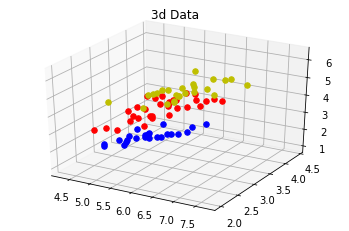

In [134]:
colors=['b','r','y'] 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(labels)):
    for j in range(len(np.unique(labels))):
        if labels[i]==np.unique(labels)[j]:
           ax.scatter(data[i,0],data[i,1],data[i,2],c=colors[j], s=30)
plt.title('3d Data')
plt.show()

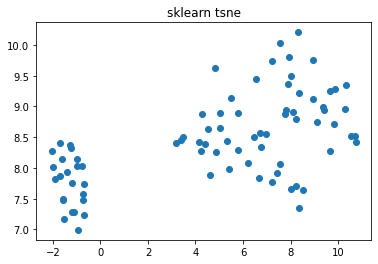

In [139]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.title('sklearn tsne')
plt.show()